In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import numpy as np
import statistics
from scipy.interpolate import interp1d

In [3]:
df2 = pd.read_csv('new_data_log2.csv', sep=',')
df3 = pd.read_csv('new_data_log03.csv', sep=',')
df4 = pd.read_csv('new_data_log04.csv', sep=',')
df5 = pd.read_csv('new_data_log05.csv', sep=',')
df6 = pd.read_csv('new_data_log06.csv', sep=',')
df8 = pd.read_csv('new_data_log08.csv', sep=',')
df9 = pd.read_csv('new_data_log09.csv', sep=',')
df10 = pd.read_csv('new_data_log10.csv', sep=',')
df11 = pd.read_csv('new_data_log11.csv', sep=',')
df12 = pd.read_csv('new_data_log12.csv', sep=',')
df13 = pd.read_csv('new_data_log13.csv', sep=',')
df14 = pd.read_csv('new_data_log14.csv', sep=',')
df16 = pd.read_csv('new_data_log16.csv', sep=',')
df17 = pd.read_csv('new_data_log17.csv', sep=',')

In [4]:
total_speed = np.concatenate([df2['Speed (km/h)'].values,
                                df3['Speed (km/h)'].values,
                                df4['Speed (km/h)'].values,
                                df5['Speed (km/h)'].values,
                                df6['Speed (km/h)'].values,
                                df8['Speed (km/h)'].values,
                                df9['Speed (km/h)'].values,
                                df10['Speed (km/h)'].values,
                                df11['Speed (km/h)'].values,
                                df12['Speed (km/h)'].values,
                                df13['Speed (km/h)'].values,
                                df14['Speed (km/h)'].values,
                                df16['Speed (km/h)'].values,
                                df17['Speed (km/h)'].values])

mean_speed = np.mean(total_speed)
median_speed = np.median(total_speed)
max_speed = np.max(total_speed)
min_speed = np.min(total_speed)
std_speed = np.std(total_speed)

print('Scenario C')
print(f'Mean speed:{mean_speed:.2f}')
print(f'Median speed:{median_speed:.2f}')
print(f'Max speed:{max_speed:.2f}')
print(f'Min speed:{min_speed:.2f}')
print(f'std speed:{std_speed:.2f}')

Scenario C
Mean speed:80.82
Median speed:80.63
Max speed:178.08
Min speed:0.00
std speed:34.70


In [5]:
max_list = []

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    max_list.append(np.max(df['Seconds']))

max_second_time = np.mean(max_list)

print(f'Mean minutes: {(np.mean(max_list)/60):.2f}')
print(f'Mean seconds: {(np.mean(max_list)):.2f}')

Mean minutes: 2.30
Mean seconds: 138.23


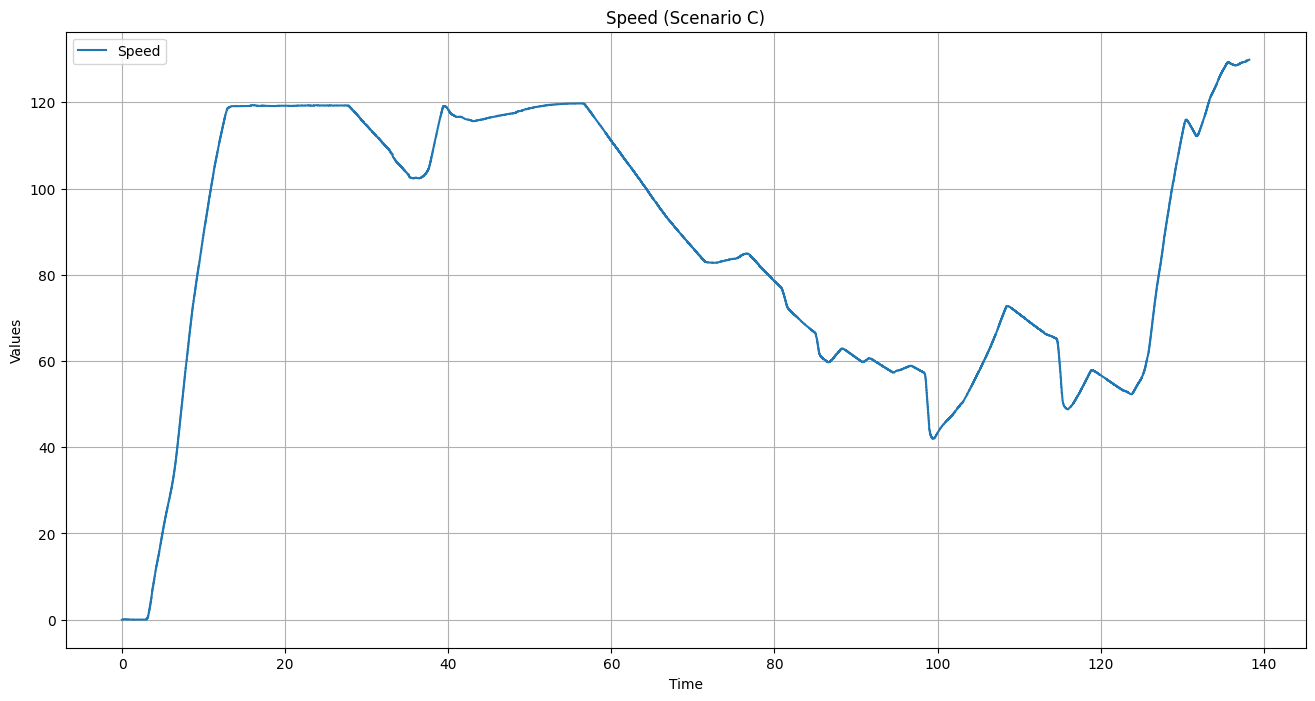

In [6]:
plt.figure(figsize=(16, 8))

plt.plot(df2['Seconds'][df2['Seconds'] <= max_second_time], df2['Speed (km/h)'][df2['Seconds'] <= max_second_time], label='Speed')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Speed (Scenario C)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


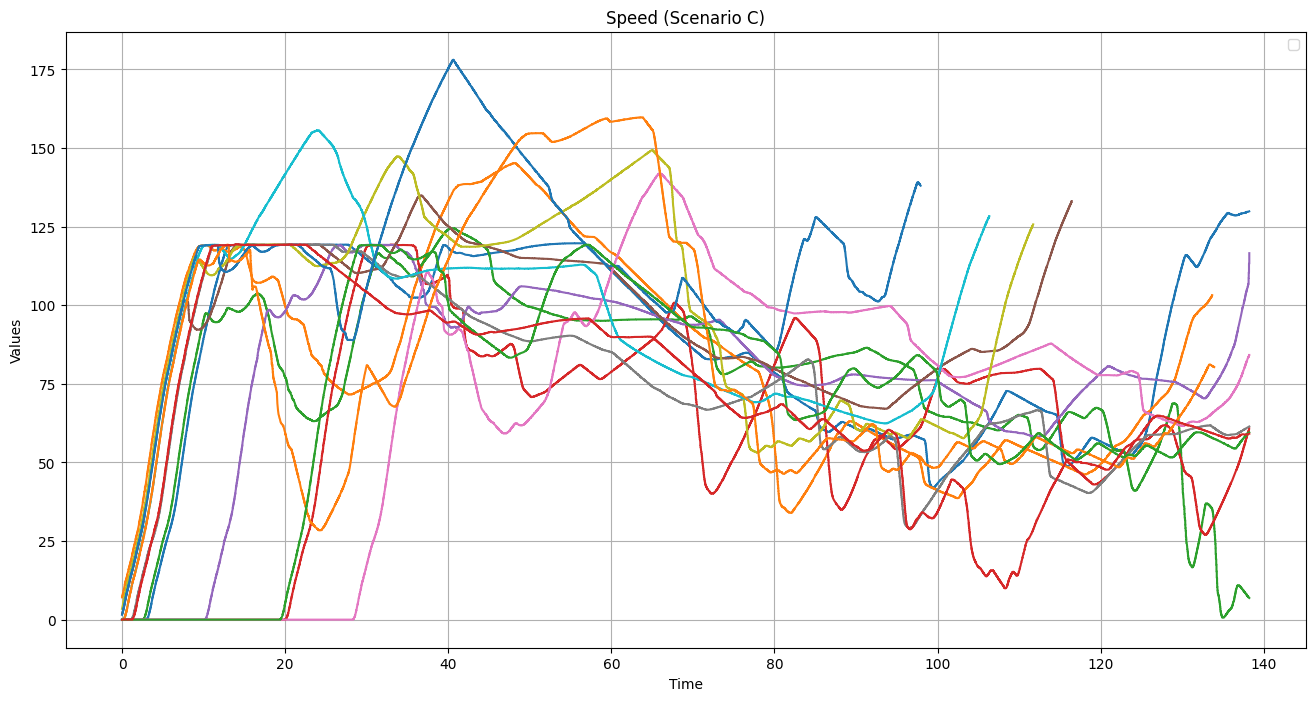

In [7]:
plt.figure(figsize=(16, 8))
for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    plt.plot(df['Seconds'][df['Seconds'] <= max_second_time], df['Speed (km/h)'][df['Seconds'] <= max_second_time])
    
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Speed (Scenario C)')
plt.legend()
plt.grid(True)

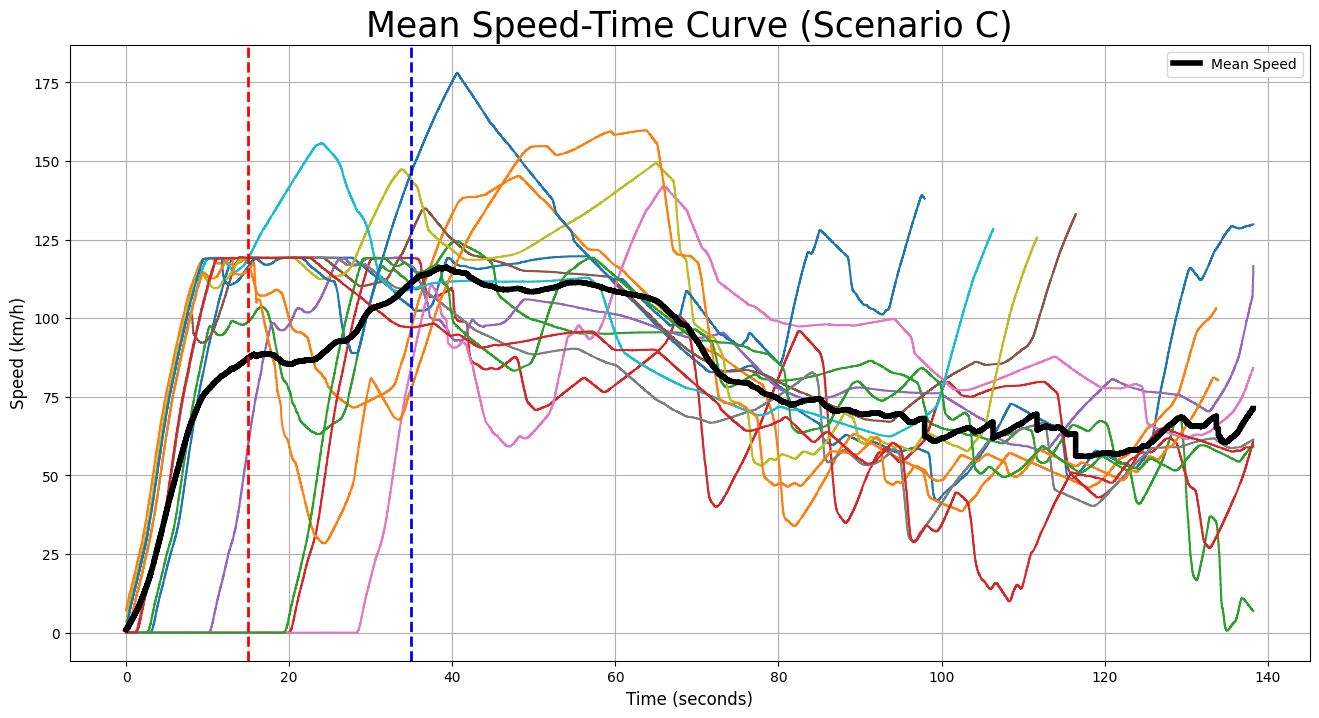

In [8]:
def pad_with_nans(array, target_length):
    if len(array) < target_length:
        return np.concatenate([array, [np.nan] * (target_length - len(array))])
    else:
        return array

speed_data = {
    'df2': {'Seconds': df2['Seconds'], 'Speed (km/h)': df2['Speed (km/h)'].values},
    'df3': {'Seconds': df3['Seconds'], 'Speed (km/h)': df3['Speed (km/h)'].values},
    'df4': {'Seconds': df4['Seconds'], 'Speed (km/h)': df4['Speed (km/h)'].values},
    'df5': {'Seconds': df5['Seconds'], 'Speed (km/h)': df5['Speed (km/h)'].values},
    'df6': {'Seconds': df6['Seconds'], 'Speed (km/h)': df6['Speed (km/h)'].values},
    'df8': {'Seconds': df8['Seconds'], 'Speed (km/h)': df8['Speed (km/h)'].values},
    'df9': {'Seconds': df9['Seconds'], 'Speed (km/h)': df9['Speed (km/h)'].values},
    'df10': {'Seconds': df10['Seconds'], 'Speed (km/h)': df10['Speed (km/h)'].values},
    'df11': {'Seconds': df11['Seconds'], 'Speed (km/h)': df11['Speed (km/h)'].values},
    'df12': {'Seconds': df12['Seconds'], 'Speed (km/h)': df12['Speed (km/h)'].values},
    'df13': {'Seconds': df13['Seconds'], 'Speed (km/h)': df13['Speed (km/h)'].values},
    'df14': {'Seconds': df14['Seconds'], 'Speed (km/h)': df14['Speed (km/h)'].values},
    'df16': {'Seconds': df16['Seconds'], 'Speed (km/h)': df16['Speed (km/h)'].values},
    'df17': {'Seconds': df17['Seconds'], 'Speed (km/h)': df17['Speed (km/h)'].values},
}

max_length = max(len(df['Speed (km/h)']) for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17])

for data in speed_data.values():
    data['Seconds'] = pad_with_nans(data['Seconds'], max_length)
    data['Speed (km/h)'] = pad_with_nans(data['Speed (km/h)'], max_length)

plt.figure(figsize=(16, 8))

for key, data in speed_data.items():
    indices = np.where(data['Seconds'] <= max_second_time)[0]
    
    seconds = data['Seconds'][indices]
    speed = data['Speed (km/h)'][indices]
    
    plt.plot(seconds, speed)

mean_speed = np.nanmean([data['Speed (km/h)'][indices] for data in speed_data.values()], axis=0)

plt.plot(seconds, mean_speed, color='black', label='Mean Speed', linewidth=4)

plt.axvline(x=15, color='red', linestyle='--', linewidth=2)
plt.axvline(x=35, color='blue', linestyle='--', linewidth=2)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.title('Mean Speed-Time Curve (Scenario C)', fontsize=25)
plt.grid(True)
plt.legend()
plt.show()



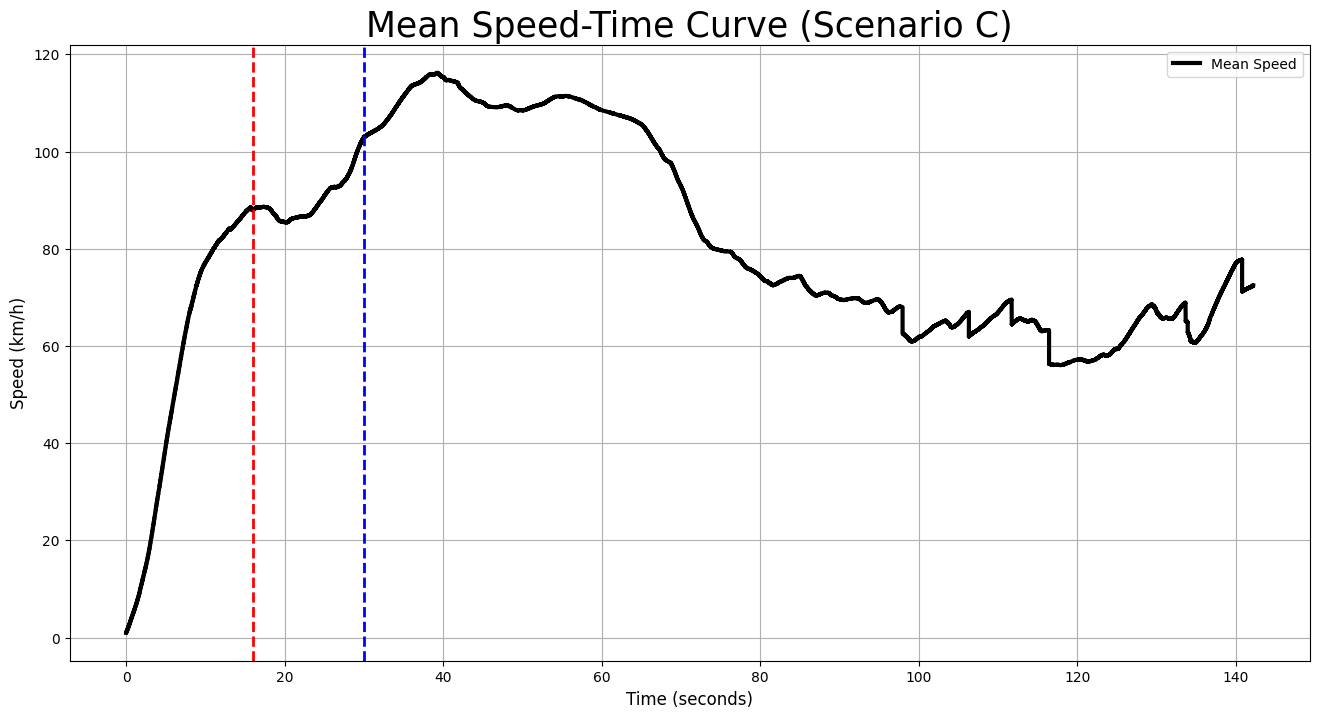

In [12]:
def pad_with_nans(array, target_length):
    if len(array) < target_length:
        return np.concatenate([array, [np.nan] * (target_length - len(array))])
    else:
        return array

speed_data = {
    'df2': {'Seconds': df2['Seconds'], 'Speed (km/h)': df2['Speed (km/h)'].values},
    'df3': {'Seconds': df3['Seconds'], 'Speed (km/h)': df3['Speed (km/h)'].values},
    'df4': {'Seconds': df4['Seconds'], 'Speed (km/h)': df4['Speed (km/h)'].values},
    'df5': {'Seconds': df5['Seconds'], 'Speed (km/h)': df5['Speed (km/h)'].values},
    'df6': {'Seconds': df6['Seconds'], 'Speed (km/h)': df6['Speed (km/h)'].values},
    'df8': {'Seconds': df8['Seconds'], 'Speed (km/h)': df8['Speed (km/h)'].values},
    'df9': {'Seconds': df9['Seconds'], 'Speed (km/h)': df9['Speed (km/h)'].values},
    'df10': {'Seconds': df10['Seconds'], 'Speed (km/h)': df10['Speed (km/h)'].values},
    'df11': {'Seconds': df11['Seconds'], 'Speed (km/h)': df11['Speed (km/h)'].values},
    'df12': {'Seconds': df12['Seconds'], 'Speed (km/h)': df12['Speed (km/h)'].values},
    'df13': {'Seconds': df13['Seconds'], 'Speed (km/h)': df13['Speed (km/h)'].values},
    'df14': {'Seconds': df14['Seconds'], 'Speed (km/h)': df14['Speed (km/h)'].values},
    'df16': {'Seconds': df16['Seconds'], 'Speed (km/h)': df16['Speed (km/h)'].values},
    'df17': {'Seconds': df17['Seconds'], 'Speed (km/h)': df17['Speed (km/h)'].values},
}

# min_length = min(len(data['Seconds']) for data in speed_data.values())

# for data in speed_data.values():
#     data['Seconds'] = data['Seconds'][:min_length]
#     data['Speed (km/h)'] = data['Speed (km/h)'][:min_length]

max_length = max(len(data['Speed (km/h)']) for data in speed_data.values())

for data in speed_data.values():
    data['Seconds'] = pad_with_nans(data['Seconds'], max_length)
    data['Speed (km/h)'] = pad_with_nans(data['Speed (km/h)'], max_length)

mean_speed = np.nanmean([data['Speed (km/h)'] for data in speed_data.values()], axis=0)

plt.figure(figsize=(16, 8))

plt.plot(speed_data['df2']['Seconds'], mean_speed, color='black', label='Mean Speed', linewidth=3)

plt.axvline(x=16, color='red', linestyle='--', linewidth=2)
plt.axvline(x=30, color='blue', linestyle='--', linewidth=2)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.title('Mean Speed-Time Curve (Scenario C)', fontsize=25)
plt.legend()
plt.grid(True)
plt.show()

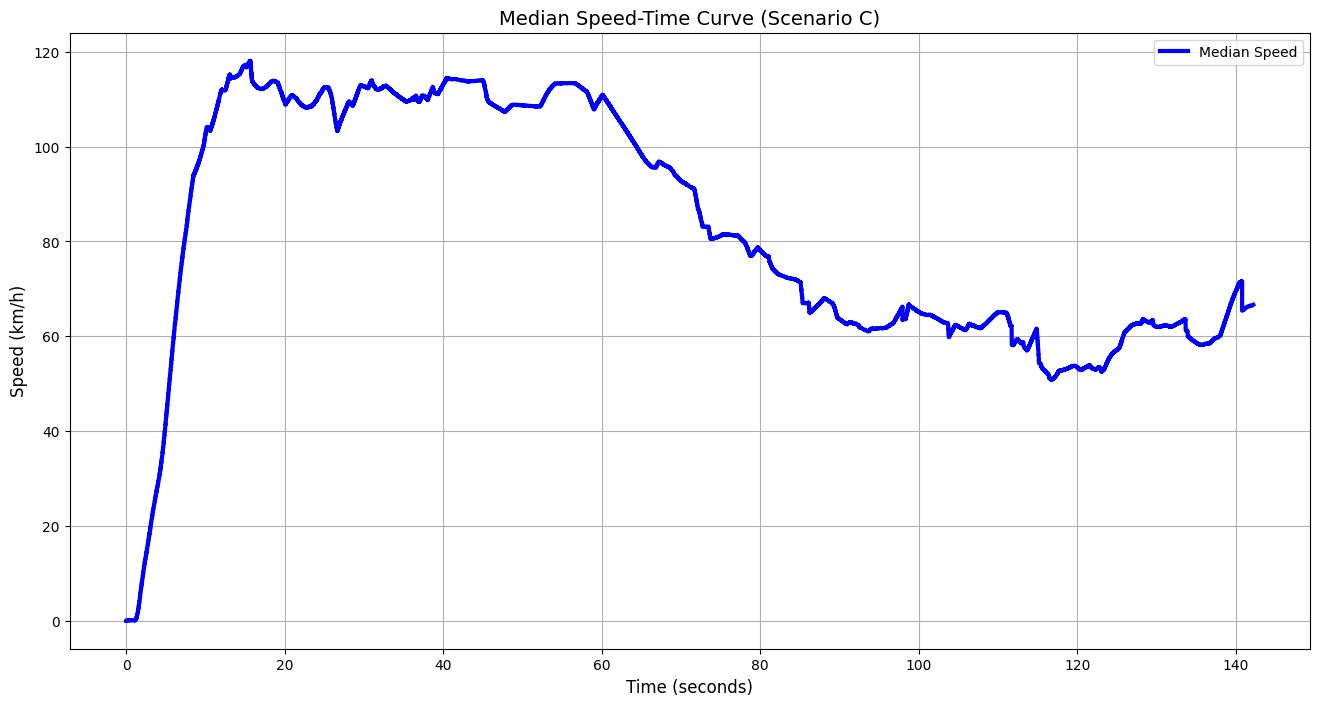

In [10]:
#this plot the median speed

def pad_with_nans(array, target_length):
    if len(array) < target_length:
        return np.concatenate([array, [np.nan] * (target_length - len(array))])
    else:
        return array

speed_data = {
    'df2': {'Seconds': df2['Seconds'], 'Speed (km/h)': df2['Speed (km/h)'].values},
    'df3': {'Seconds': df3['Seconds'], 'Speed (km/h)': df3['Speed (km/h)'].values},
    'df4': {'Seconds': df4['Seconds'], 'Speed (km/h)': df4['Speed (km/h)'].values},
    'df5': {'Seconds': df5['Seconds'], 'Speed (km/h)': df5['Speed (km/h)'].values},
    'df6': {'Seconds': df6['Seconds'], 'Speed (km/h)': df6['Speed (km/h)'].values},
    'df8': {'Seconds': df8['Seconds'], 'Speed (km/h)': df8['Speed (km/h)'].values},
    'df9': {'Seconds': df9['Seconds'], 'Speed (km/h)': df9['Speed (km/h)'].values},
    'df10': {'Seconds': df10['Seconds'], 'Speed (km/h)': df10['Speed (km/h)'].values},
    'df11': {'Seconds': df11['Seconds'], 'Speed (km/h)': df11['Speed (km/h)'].values},
    'df12': {'Seconds': df12['Seconds'], 'Speed (km/h)': df12['Speed (km/h)'].values},
    'df13': {'Seconds': df13['Seconds'], 'Speed (km/h)': df13['Speed (km/h)'].values},
    'df14': {'Seconds': df14['Seconds'], 'Speed (km/h)': df14['Speed (km/h)'].values},
    'df16': {'Seconds': df16['Seconds'], 'Speed (km/h)': df16['Speed (km/h)'].values},
    'df17': {'Seconds': df17['Seconds'], 'Speed (km/h)': df17['Speed (km/h)'].values},
}


max_length = max(len(data['Speed (km/h)']) for data in speed_data.values())

for data in speed_data.values():
    data['Seconds'] = pad_with_nans(data['Seconds'], max_length)
    data['Speed (km/h)'] = pad_with_nans(data['Speed (km/h)'], max_length)

median_speed = np.nanmedian([data['Speed (km/h)'] for data in speed_data.values()], axis=0)

plt.figure(figsize=(16, 8))

plt.plot(speed_data['df2']['Seconds'], median_speed, color='b', label='Median Speed', linewidth=3)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.title('Median Speed-Time Curve (Scenario C)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

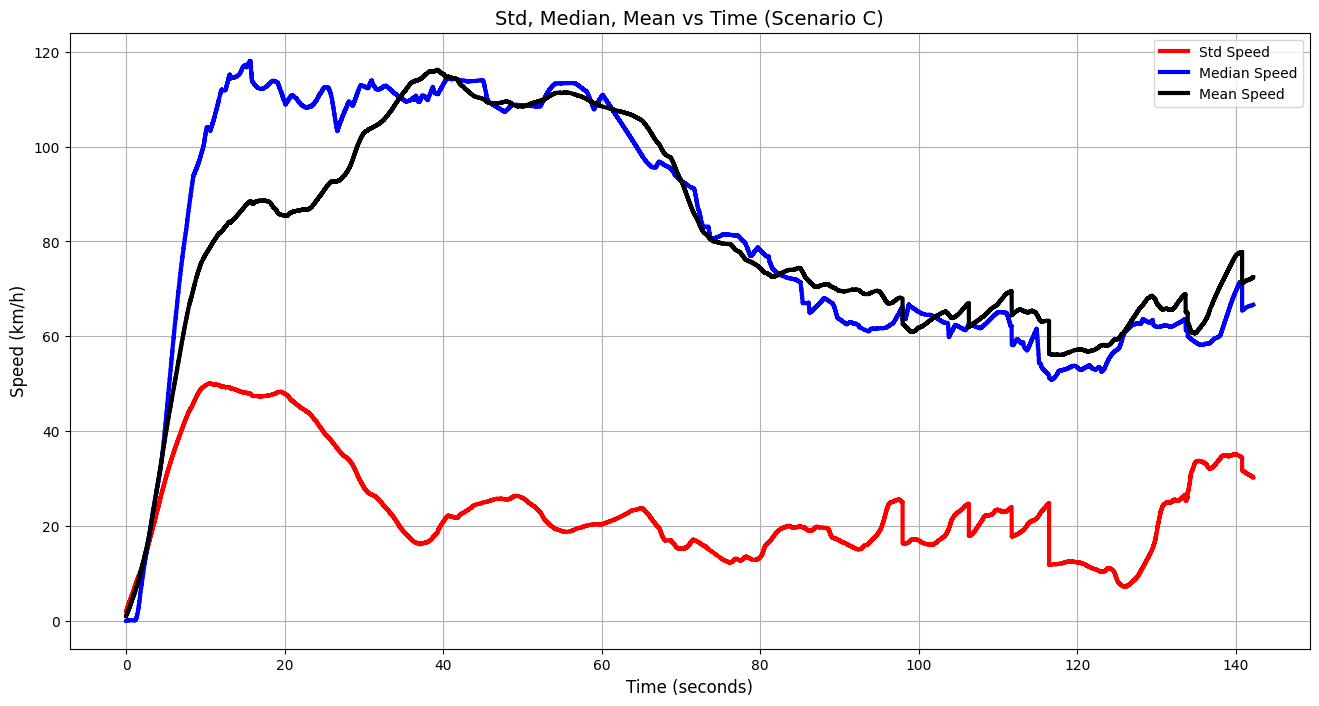

In [11]:

plt.figure(figsize=(16, 8))

std_speed = np.nanstd([data['Speed (km/h)'] for data in speed_data.values()], axis=0)
median_speed = np.nanmedian([data['Speed (km/h)'] for data in speed_data.values()], axis=0)
mean_speed = np.nanmean([data['Speed (km/h)'] for data in speed_data.values()], axis=0)

plt.plot(speed_data['df2']['Seconds'], std_speed, color='red', label='Std Speed', linewidth=3)
plt.plot(speed_data['df2']['Seconds'], median_speed, color='blue', label='Median Speed', linewidth=3)
plt.plot(speed_data['df2']['Seconds'], mean_speed, color='black', label='Mean Speed', linewidth=3)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.title('Std, Median, Mean vs Time (Scenario C)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()